# **Imports**

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import (StandardScaler, OrdinalEncoder,LabelEncoder, MinMaxScaler, OneHotEncoder)
from sklearn.preprocessing import Normalizer, MaxAbsScaler , RobustScaler, PowerTransformer

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

import tensorflow as tf
from keras.utils import to_categorical

from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.layers import Input
from keras.models import Model
# representation of model layers
from keras.utils import plot_model

## Reading Data

In [2]:
feature=["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","target"]

In [3]:
train_data=pd.read_csv('KDDTrain+.txt',names=feature)
test_data=pd.read_csv('KDDTest+.txt',names=feature)
test_21 = pd.read_csv('KDDTest-21.txt', names= feature)

In [4]:
train_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
0,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
0,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
0,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
8,udp,private,SF,105,145,0,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
0,tcp,smtp,SF,2231,384,0,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
0,tcp,klogin,S0,0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


**Data Exploration**

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125973 entries, 0 to 0
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  object 
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13  root

In [6]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
flag,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
src_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
dst_bytes,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
land,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
wrong_fragment,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
hot,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
num_failed_logins,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
logged_in,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03
num_compromised,125973.0,0.001342,3.660284e-02,0.0,0.00,0.00,0.00,1.000000e+00


In [7]:
# number of attack labels 
train_data['target'].value_counts()

21    62557
18    20667
20    19339
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
6        96
5        81
4        79
0        66
3        65
1        62
2        54
Name: target, dtype: int64

# **Data Analysis**


*   Data Visualization
*   Data Mining



### Label

In [8]:
# number of attack labels 
train_data['target'].value_counts()

21    62557
18    20667
20    19339
19    10284
15     3990
17     3074
16     2393
12      729
14      674
11      641
13      451
10      253
9       194
7       118
8       106
6        96
5        81
4        79
0        66
3        65
1        62
2        54
Name: target, dtype: int64

### Protocol

In [9]:
# changing attack labels into two categories 'normal' and 'abnormal'
bin_data = train_data.copy()
bin_label = pd.DataFrame(train_data.target.map(lambda x:'normal' if x=='normal' else 'abnormal'))
bin_data['target'] = bin_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,tcp,ftp_data,SF,491,0,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,abnormal
0,udp,other,SF,146,0,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,abnormal
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,abnormal
0,tcp,http,SF,232,8153,0,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,abnormal
0,tcp,http,SF,199,420,0,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,private,S0,0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,abnormal
8,udp,private,SF,105,145,0,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,abnormal
0,tcp,smtp,SF,2231,384,0,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,abnormal
0,tcp,klogin,S0,0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,abnormal


In [10]:
# selecting numeric attributes columns from data
numeric_col = bin_data.select_dtypes(include='number').columns
numeric_col

Index(['flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
       'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate'],
      dtype='object')

In [11]:
# using standard scaler for normalizing
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

In [12]:
# calling the normalization() function
bin_data = standardization(bin_data,numeric_col)

In [13]:
# label encoding (0,1) binary labels (abnormal,normal)
le1 = preprocessing.LabelEncoder()
enc_label = bin_label.apply(le1.fit_transform)
bin_data['intrusion'] = enc_label
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,intrusion
0,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,abnormal,0
0,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,abnormal,0
0,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,neptune,abnormal,0
0,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,abnormal,0
0,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,abnormal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,neptune,abnormal,0
8,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,abnormal,0
0,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,normal,abnormal,0
0,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,neptune,abnormal,0


In [14]:
bin_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,intrusion
0,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,normal,abnormal,0
0,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,abnormal,0
0,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,neptune,abnormal,0
0,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,normal,abnormal,0
0,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,abnormal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,neptune,abnormal,0
8,udp,private,SF,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,normal,abnormal,0
0,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,normal,abnormal,0
0,tcp,klogin,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,...,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,neptune,abnormal,0


****One-hot encoding****

In [15]:
bin_data = pd.get_dummies(bin_data,columns=['protocol_type','service','flag'],prefix="",prefix_sep="") 
bin_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,3.1997315362194882,3.7306311180991507,4.151947350528844,15.25234366892881,37.00517530386838,65.0159294769655,105.87572385674464,118.10795740305188,198.87780227997663,235.0674528527199
0,tcp,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,udp,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,tcp,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,tcp,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,tcp,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0


In [16]:
bin_data.drop(labels= [ 'target'], axis=1, inplace=True)
bin_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,3.1997315362194882,3.7306311180991507,4.151947350528844,15.25234366892881,37.00517530386838,65.0159294769655,105.87572385674464,118.10795740305188,198.87780227997663,235.0674528527199
0,tcp,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,udp,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,tcp,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,tcp,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,tcp,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
8,udp,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,tcp,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,tcp,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y_train_bin= bin_data[['intrusion']]
X_train_bin= bin_data.drop(labels=['intrusion'], axis=1)

print('X_train has shape:',X_train_bin.shape,'\ny_train has shape:',y_train_bin.shape)

X_train has shape: (125973, 3460) 
y_train has shape: (125973, 1)


In [18]:
X_train_bin

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,3.1997315362194882,3.7306311180991507,4.151947350528844,15.25234366892881,37.00517530386838,65.0159294769655,105.87572385674464,118.10795740305188,198.87780227997663,235.0674528527199
0,tcp,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,udp,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,tcp,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,tcp,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,tcp,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,tcp,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
8,udp,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,tcp,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0
0,tcp,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,-0.036652,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y_train_bin

,intrusion
0,0
0,0
0,0
0,0
0,0
...,...
0,0
8,0
0,0
0,0


## Binary Classification

In [20]:
# splitting the dataset 80% for training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_train_bin,y_train_bin, test_size=0.2, random_state=42)

In [21]:
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
mlp.add(Dense(units=25, activation='relu'))
# output layer with sigmoide activation
mlp.add(Dense(1,activation='sigmoid'))

In [22]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# training the model on training dataset
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

: 

In [ ]:
# predicting target attribute on testing dataset
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

3088/3088 [==============================] - 5s 1ms/step - loss: 1.7155e-07 - accuracy: 1.0000
Test results - Loss: 1.7155389286926948e-07 - Accuracy: 100.0%


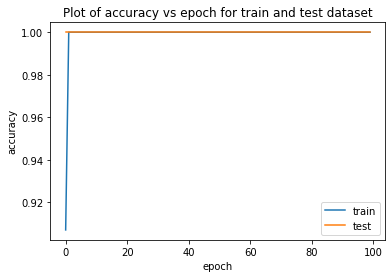

In [ ]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

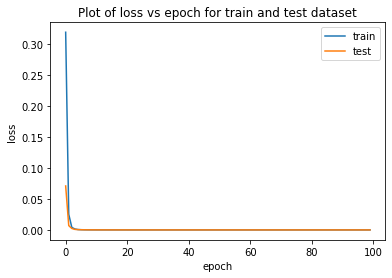

In [ ]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
y_pred = mlp.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


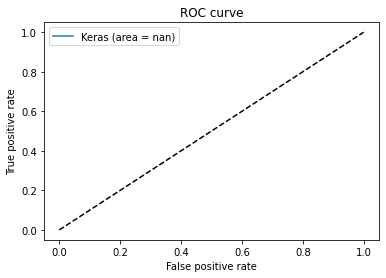

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()